In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # scikit-learn metrics module for computing accuracy
import warnings
warnings.filterwarnings('ignore') # Ignore warning messages



In [21]:
#Loading dataset
wines_df = pd.read_csv('wine.csv')
print(wines_df.head()) # Preview the dataset
print(wines_df.shape) # Number of instances and variables

   Label  Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  \
0      1    13.20        1.78  2.14               11.2        100   
1      1    13.16        2.36  2.67               18.6        101   
2      1    14.37        1.95  2.50               16.8        113   
3      1    13.24        2.59  2.87               21.0        118   
4      1    14.20        1.76  2.45               15.2        112   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.65        2.76                  0.26             1.28   
1           2.80        3.24                  0.30             2.81   
2           3.85        3.49                  0.24             2.18   
3           2.80        2.69                  0.39             1.82   
4           3.27        3.39                  0.34             1.97   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             4.38  1.05                          3.40     1050  
1             5.68  1.03  

In [22]:
#Renaming columns

# col_names = ['alochol', 'malicacid', 'ash', 'alcalinity_of_ash', 'magenesium', 'magnesium.1', 'total_phenols', 'flavanoids',
# 'nonflavanoid_phenols',"proanthocyanins","colo"] # Define new column names
# diabetes_df.columns = col_names # Rename column names

In [23]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic Acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [24]:
#Defining feature vector and target variable
X = wines_df.drop(['Label'], axis=1) # Drop the target variable
y = wines_df['Label']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=12) # 75% training and 25% test




In [25]:
#Building decision tree classifier with the Gini index criterion
clf_gini = DecisionTreeClassifier(criterion='gini',
max_depth=4,
random_state=42) # Create decision tree


clf_entropy = DecisionTreeClassifier(criterion='entropy',
max_depth=4,
random_state=42) # Create decision tree



#classifier object
clf_gini.fit(X_train, y_train) # Train the classifier

clf_entropy.fit(X_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

Gini Index
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.91      0.91      0.91        11
           3       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



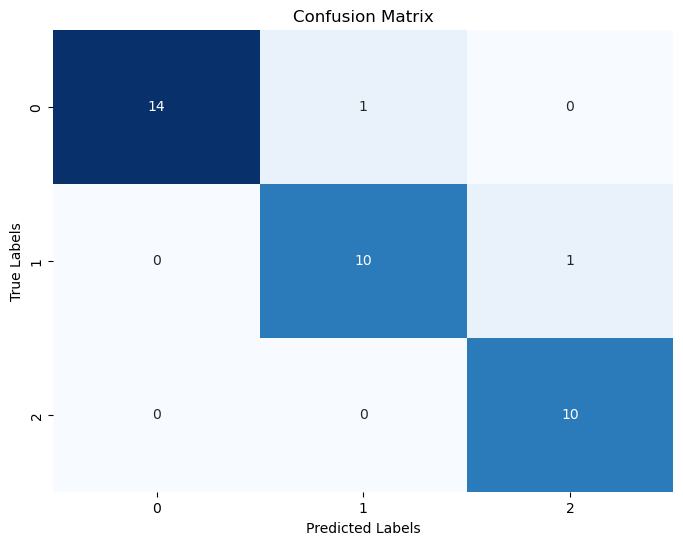



Entropy Critera
Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



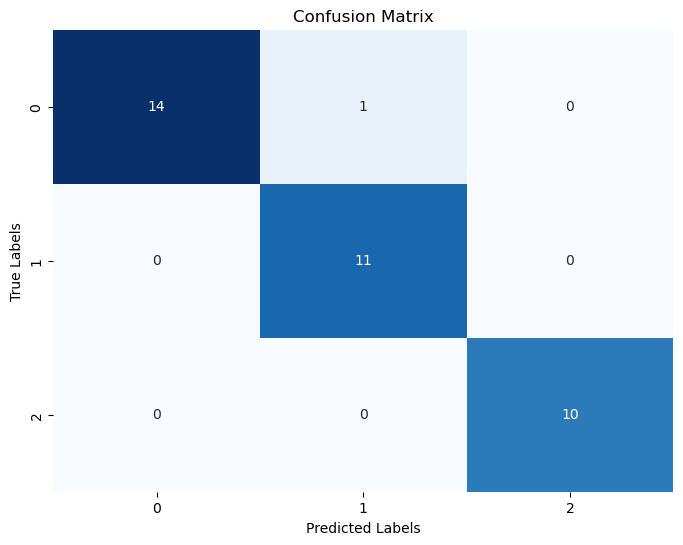

In [26]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    plt.title('Confusion Matrix')
    plt.show()

# Example confusion matrix



y_pred = clf_gini.predict(X_test)
print("Gini Index")
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat)


print("\n")
y_pred = clf_entropy.predict(X_test)
print("Entropy Critera")
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat)



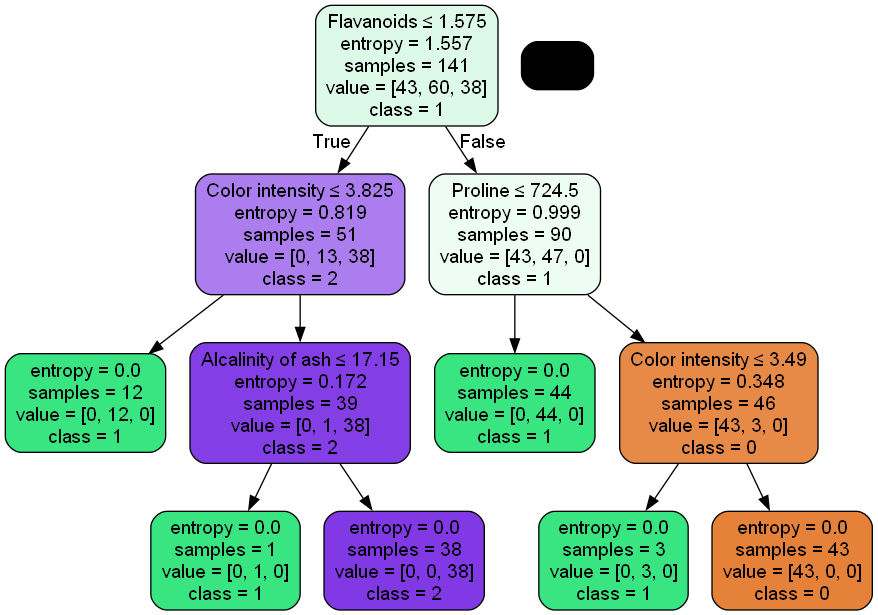

In [27]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=X.columns,
    class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('clf_gini.png')
Image(graph.create_png())


dot_data = StringIO()
export_graphviz(clf_entropy,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=X.columns,
    class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('clf_entropy.png')
Image(graph.create_png())

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [29]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(clf_gini, X, y, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the accuracy scores for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Accuracy scores: [0.91666667 0.80555556 0.88571429 0.82857143 0.94285714]
Mean accuracy: 0.8758730158730159


Gini Index
Accuracy: 0.8444444444444444
              precision    recall  f1-score   support

           1       0.94      0.83      0.88        18
           2       0.94      0.80      0.86        20
           3       0.58      1.00      0.74         7

    accuracy                           0.84        45
   macro avg       0.82      0.88      0.83        45
weighted avg       0.88      0.84      0.85        45



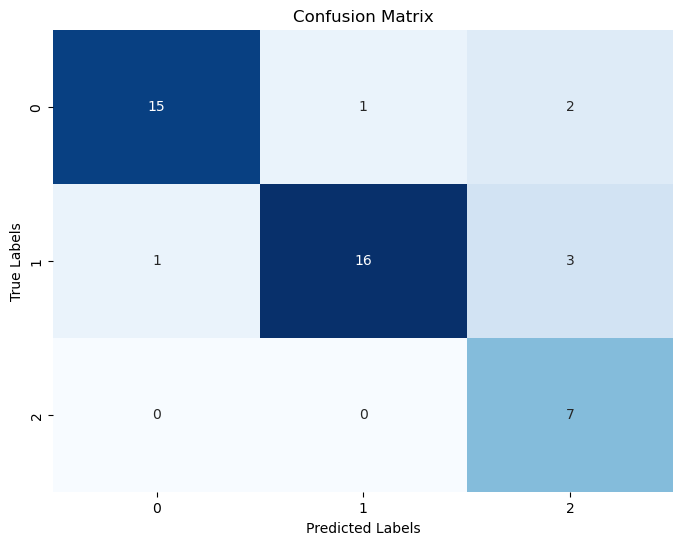

In [30]:
import pandas as pd
import numpy as np


# Set the random seed for reproducibility
np.random.seed(42)

# Define the portion of entries to make null
portion = 0.1  # 30% of entries

# Generate random indices for rows and columns
num_rows = X.shape[0]
num_cols = X.shape[1]
num_entries = int(num_rows * num_cols * portion)

row_indices = np.random.choice(num_rows, size=num_entries, replace=True)
col_indices = np.random.choice(num_cols, size=num_entries, replace=True)

# Convert DataFrame to float type
X = X.astype(float)

# Assign NaN values to the randomly selected entries
X.values[row_indices, col_indices] = np.nan
X=X.fillna(X.mean())

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=1) # 75% training and 25% test


#classifier object
clf_gini.fit(X_train, y_train) # Train the classifier
y_pred = clf_gini.predict(X_test)
print("Gini Index")
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat)

